In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df=pd.read_csv('telecom_churn.csv')
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [ ]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


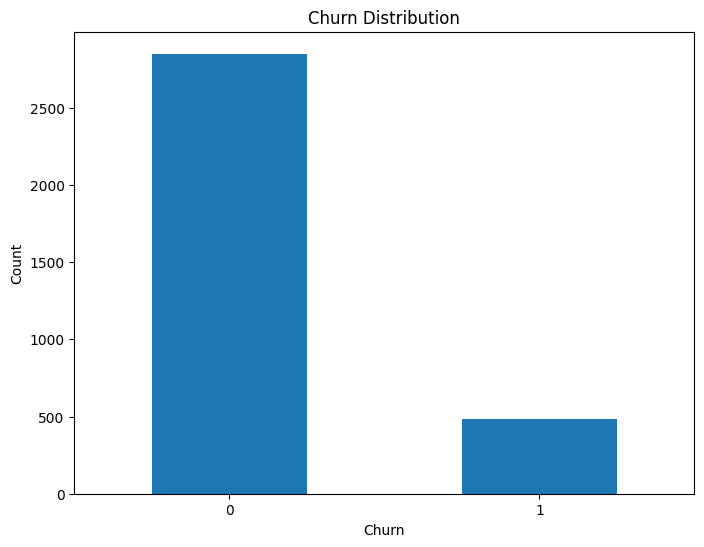

In [ ]:
plt.figure(figsize=(8,6))
df['Churn'].value_counts().plot(kind='bar')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

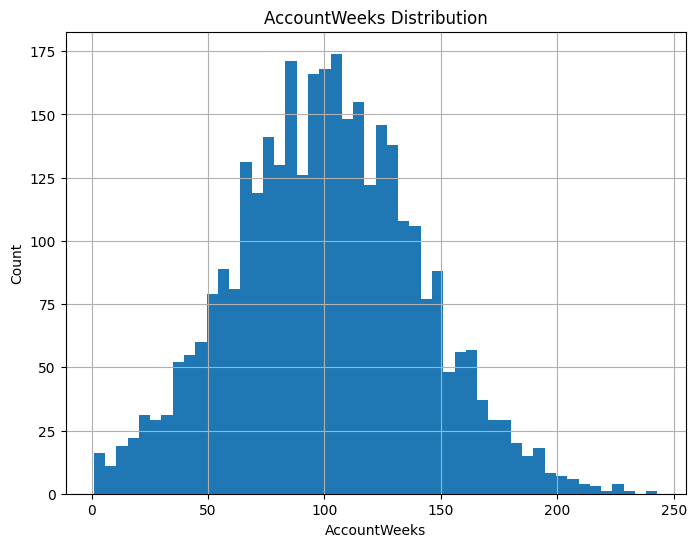

In [ ]:
plt.figure(figsize=(8,6))
df['AccountWeeks'].hist(bins=50)
plt.title('AccountWeeks Distribution')
plt.xlabel('AccountWeeks')
plt.ylabel('Count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

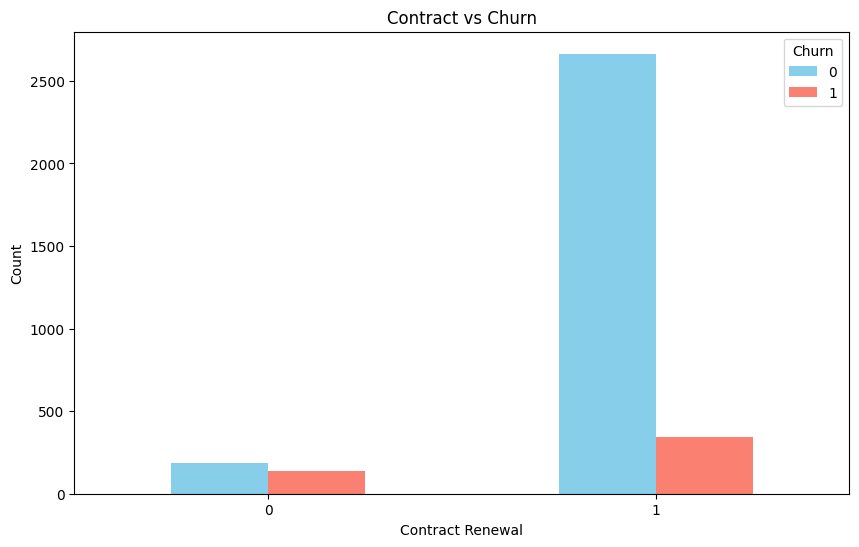

In [ ]:
contract_churn=pd.crosstab(df['ContractRenewal'],df['Churn'])

contract_churn.plot(kind='bar', figsize=(10,6),color=['skyblue','salmon'])
plt.title('Contract vs Churn')
plt.xlabel('Contract Renewal')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 800x600 with 0 Axes>

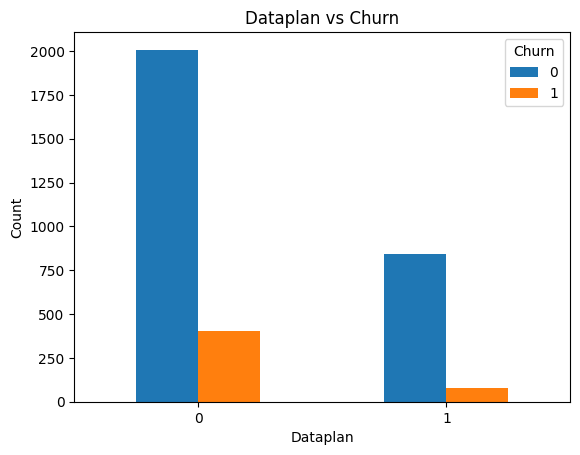

In [ ]:
plt.figure(figsize=(8,6))
pd.crosstab(df['DataPlan'],df['Churn']).plot(kind='bar')
plt.title('Dataplan vs Churn')
plt.xlabel('Dataplan')
plt.ylabel('Count')
plt.xticks(rotation=0 )
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

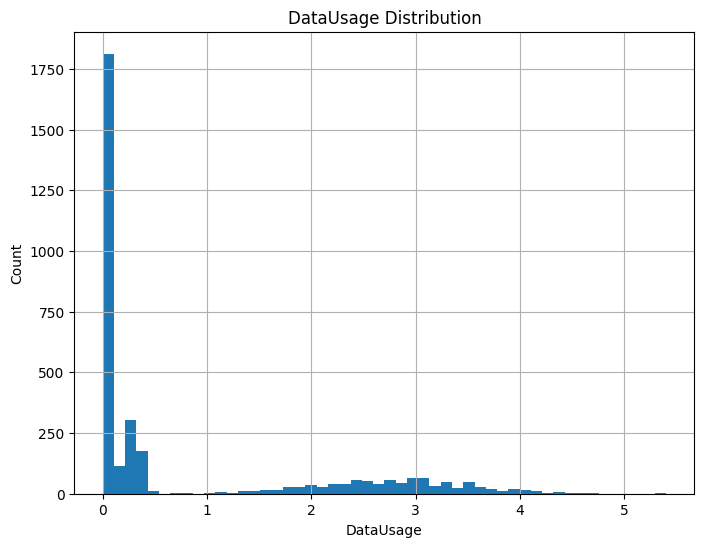

In [ ]:
plt.figure(figsize=(8,6))
df['DataUsage'].hist(bins=50)
plt.title('DataUsage Distribution')
plt.xlabel('DataUsage')
plt.ylabel('Count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 800x600 with 0 Axes>

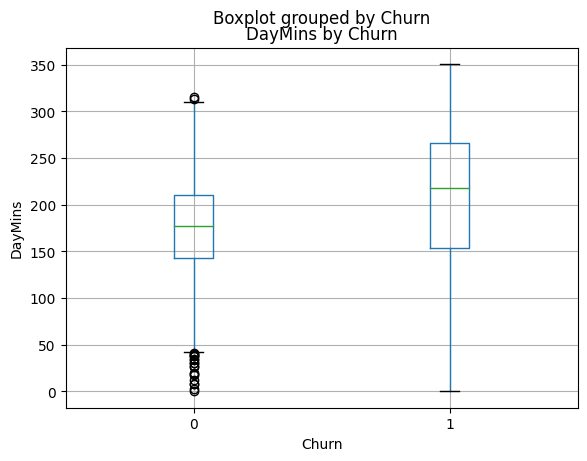

In [ ]:
plt.figure(figsize=(8,6))
df.boxplot(column='DayMins',by='Churn')
plt.title('DayMins by Churn')
plt.xlabel('Churn')
plt.ylabel('DayMins')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 800x600 with 0 Axes>

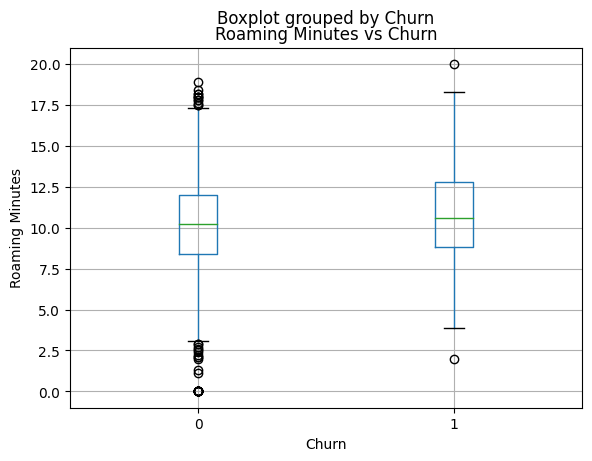

In [ ]:
plt.figure(figsize=(8,6))
df.boxplot(column='RoamMins',by='Churn')
plt.title('Roaming Minutes vs Churn')
plt.xlabel('Churn')
plt.ylabel('Roaming Minutes')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

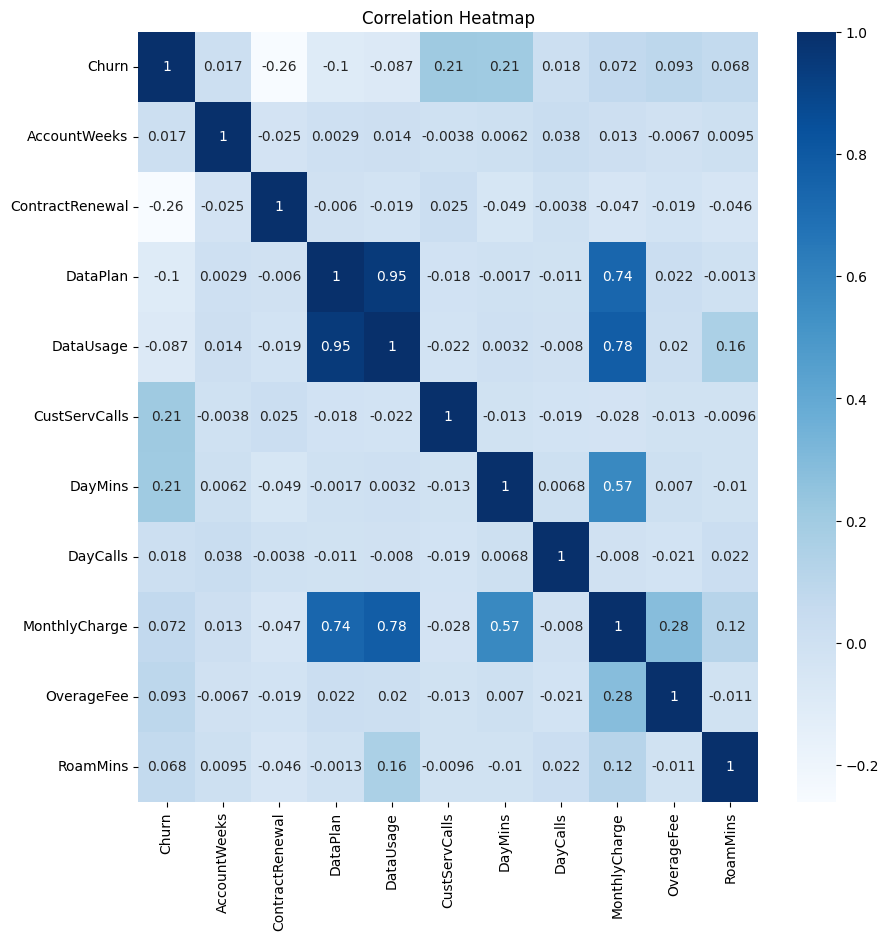

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.title('Correlation Heatmap')
plt.show

In [ ]:
X=df.drop('Churn',axis=1)
y=df['Churn']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_train_scaled
X_test_scaled=scaler.transform(X_test)
X_test_scaled

array([[ 0.31304568,  0.32388048, -0.61444668, ..., -0.07520216,
         2.55372958,  1.1739772 ],
       [-0.84005718,  0.32388048, -0.61444668, ..., -1.12085947,
         0.32039901,  0.9228181 ],
       [-0.06296612,  0.32388048, -0.61444668, ..., -2.59708156,
        -0.81994115, -1.22997423],
       ...,
       [-0.56431519,  0.32388048, -0.61444668, ..., -1.36689649,
         0.26910344,  0.20522066],
       [-0.91525954,  0.32388048, -0.61444668, ..., -0.99784096,
        -0.71340418,  0.74341874],
       [ 1.01493438,  0.32388048, -0.61444668, ...,  0.35536262,
         0.65184737, -1.5170132 ]])

In [ ]:
clfr=RandomForestClassifier(n_estimators=100,random_state=0)
clfr.fit(X_train_scaled,y_train)

pr=clfr.predict(X_test_scaled)
print(classification_report(y_test,pr))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       940
           1       0.87      0.64      0.74       160

    accuracy                           0.93      1100
   macro avg       0.90      0.81      0.85      1100
weighted avg       0.93      0.93      0.93      1100

